<a href="https://colab.research.google.com/github/UtkarshKalra02/Network-Traffic-Classification-and-Intrusion-Detection/blob/main/TrafficClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas

In [ ]:
%matplotlib inline
import matplotlib
import pandas as pd
import numpy as np
import pickle
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import imblearn
import sys
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.utils.multiclass import unique_labels
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from numpy import genfromtxt


# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
#np.set_printoptions(threshold=np.nan)
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=3)
sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

print("pandas : {0}".format(pd.__version__))
print("numpy : {0}".format(np.__version__))
print("matplotlib : {0}".format(matplotlib.__version__))
print("seaborn : {0}".format(sns.__version__))
print("sklearn : {0}".format(sklearn.__version__))
print("imblearn : {0}".format(imblearn.__version__))

pandas : 2.2.2
numpy : 1.26.4
matplotlib : 3.8.0
seaborn : 0.13.2
sklearn : 1.5.2
imblearn : 0.12.4


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNDataset/KDDTrain.csv')
df_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,19


In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/CNDataset/KDDTest.csv')
df_train.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,19


In [ ]:
mapping = {'http': 'browsing','http_8001': 'browsing','http_2784': 'browsing','http_443': 'browsing',
           'ftp': 'file_transfer','ftp_data': 'file_transfer','efs': 'file_transfer','ldap': 'file_transfer',
           'tftp_u': 'file_transfer',
           'pop_2': 'mail','pop_3': 'mail','smtp': 'mail','imap4': 'mail','aol': 'mail','nntp': 'mail','nnsp': 'mail',
           'iso_tsap': 'mail','csnet_ns': 'mail',
           'remote_job': 'remote_jobs','rje': 'remote_jobs','sunrpc': 'remote_jobs','courier': 'remote_jobs',
           'exec': 'remote_jobs','printer': 'remote_jobs',
           'daytime': 'time','time': 'time','ntp_u': 'time',
           'name': 'DNS','hostnames': 'DNS','domain': 'DNS','whois': 'DNS',
           'netbios_ns': 'netbios','netbios_dgm': 'netbios','netbios_ssn': 'netbios',
           'eco_i': 'error_reports','urp_i': 'error_reports','ecr_i': 'error_reports','tim_i': 'error_reports',
           'red_i': 'error_reports','urh_i': 'error_reports',
           'finger': 'auth','auth': 'auth','supdup': 'auth','login': 'auth',
           'Z39_50': 'search','gopher': 'search',
           'kshell': 'kerberos','klogin': 'kerberos',
           'systat': 'unix','netstat': 'unix','X11': 'unix','discard': 'unix','echo': 'unix','uucp_path': 'unix',
           'uucp': 'unix',
           'telnet': 'telnet','ssh': 'telnet','shell': 'telnet',
           'ctf': 'text_services','IRC': 'text_services',
           'other': 'others','harvest': 'others','bgp': 'others','link': 'others','pm_dump': 'others',
           'private': 'private',
           'vmnet': 'virtual_network',
           'sql_net': 'oracle',
           'mtp': 'media','domain_u': 'media'
        }

In [ ]:
df_train['class'] = df_train['service'].apply(lambda v: mapping[v])
df_test['class'] = df_test['service'].apply(lambda v: mapping[v])

In [ ]:
df_train.drop(['service'], axis=1, inplace=True)
df_test.drop(['service'], axis=1, inplace=True)

In [ ]:
df_train.head(3)

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,last_flag,class
0,0,tcp,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.0,150,25,0.17,0.03,0.17,0.0,0.0,0.0,0.05,0.0,normal,20,file_transfer
1,0,udp,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.0,255,1,0.00,0.60,0.88,0.0,0.0,0.0,0.00,0.0,normal,15,others
2,0,tcp,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.0,255,26,0.10,0.05,0.00,0.0,1.0,1.0,0.00,0.0,neptune,19,private


In [ ]:
df_train['num_outbound_cmds'].value_counts()

,count
num_outbound_cmds,
0,125973


In [ ]:
df_test['num_outbound_cmds'].value_counts()

,count
num_outbound_cmds,
0,22544


In [ ]:
df_train.drop(['num_outbound_cmds'], axis=1, inplace=True)
df_test.drop(['num_outbound_cmds'], axis=1, inplace=True)

In [ ]:
servicefreq_train = df_train[['class']].apply(lambda x: x.value_counts())
servicefreq_test = df_test[['class']].apply(lambda x: x.value_counts())
servicefreq_train['freqpercent_train'] = round((100 * servicefreq_train / servicefreq_train.sum()),2)
servicefreq_test['freqpercent_test'] = round((100 * servicefreq_test / servicefreq_test.sum()),2)

service_dist = pd.concat([servicefreq_train,servicefreq_test], axis=1)
service_dist

,class,freqpercent_train,class,freqpercent_test
class,,,,
browsing,40871,32.44,7889,34.99
private,21853,17.35,4774,21.18
mail,10462,8.30,2417,10.72
file_transfer,9512,7.55,1596,7.08
media,9482,7.53,926,4.11
error_reports,8291,6.58,1043,4.63
others,5551,4.41,941,4.17
auth,3695,2.93,259,1.15
unix,3351,2.66,232,1.03


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
cols = df_train.select_dtypes(include=['float64','int64']).columns

sc_train = scaler.fit_transform(df_train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(df_test.select_dtypes(include=['float64','int64']))

sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cattrain = df_train.select_dtypes(include=['object']).copy()
cattest = df_test.select_dtypes(include=['object']).copy()

traincat = cattrain.apply(le.fit_transform)
testcat = cattest.apply(le.fit_transform)

enctrain = traincat.drop(['class'], axis = 1)
enctest = testcat.drop(['class'], axis=1)

catYtrain = traincat[['class']].copy()
catYtest = testcat[['class']].copy()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

sc_traindf = df_train.select_dtypes(include=['float64','int64'])
refclasscol = pd.concat([sc_traindf, enctrain], axis=1).columns
refclass = np.concatenate((sc_train, enctrain.values), axis=1)
X = refclass

c, r = catYtest.values.shape
y_test = catYtest.values.reshape(c,)

c, r = catYtrain.values.shape
y = catYtrain.values.reshape(c,)

random = RandomOverSampler(random_state=42)
X_res, y_res = random.fit_resample(X, y)

print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({2: 40871, 11: 21853, 6: 10462, 4: 9512, 7: 9482, 3: 8291, 10: 5551, 1: 3695, 17: 3351, 14: 2729, 0: 2173, 12: 1822, 13: 1380, 16: 1343, 8: 1114, 15: 750, 5: 732, 18: 617, 9: 245})
Resampled dataset shape Counter({4: 40871, 10: 40871, 11: 40871, 2: 40871, 12: 40871, 0: 40871, 8: 40871, 3: 40871, 7: 40871, 14: 40871, 1: 40871, 17: 40871, 13: 40871, 6: 40871, 18: 40871, 5: 40871, 9: 40871, 16: 40871, 15: 40871})


**Feature Selection Algorithm:**


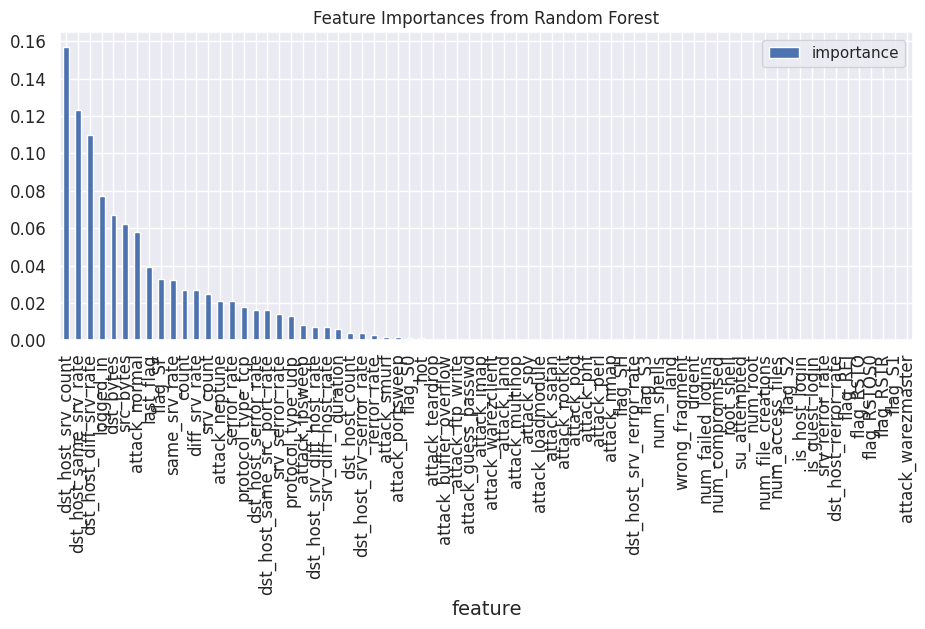

In [ ]:
# Separate features (X_res) and target variable (y_res)
X_res = df_train.drop("class", axis=1)
y_res = df_train["class"]

# Encode the target variable to convert string labels to numeric labels
label_encoder = LabelEncoder()
y_res = label_encoder.fit_transform(y_res)

# Identify and encode any remaining non-numeric columns in X_res
non_numeric_cols = X_res.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    X_res = pd.get_dummies(X_res, columns=non_numeric_cols, drop_first=True)

# Fit a RandomForestClassifier on the processed data
rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_res, y_res)

# Extract and plot feature importance
score = np.round(rfc.feature_importances_, 3)
importances = pd.DataFrame({'feature': X_res.columns, 'importance': score})
importances = importances.sort_values('importance', ascending=False).set_index('feature')

# Plot the feature importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()
plt.title("Feature Importances from Random Forest")
plt.show()

In [ ]:
X=df_train[['dst_host_srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'wrong_fragment',
            'root_shell', 'land', 'flag', 'attack', 'dst_host_count', 'src_bytes']]
y = df_train['class']

print("Splitting into Train and Test")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, shuffle=True)


Splitting into Train and Test


In [ ]:
def pretty_confusion(y_true, y_pred, model_name):
  matrix = confusion_matrix(y_true, y_pred)
  matrix = matrix.astype('float')/matrix.sum(axis=1)[:, np.newaxis]

  plt.figure(figsize=(16,7))
  sns.set(font_scale=1.4)
  sns.heatmap(matrix, annot=True, annot_kws={'size':10},
              cmap=plt.cm.Greens, linewidths=0.2)

  classNames = ['DNS', 'auth', 'browsing', 'error_reports', 'file_transfer', 'kerberos', 'mail', 'media', 'netbios',
                   'oracle', 'others', 'private', 'remote_jobs', 'search', 'telnet', 'text_services', 'time', 'unix',
                   'virtual_network']
  tick_marks = np.arange(len(classNames))
  tick_marks2 = tick_marks + 0.5
  plt.xticks(tick_marks, classNames, rotation=25)
  plt.yticks(tick_marks2, classNames, rotation=0)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix for {}'.format(model_name))
  plt.tight_layout()

**Random Forest Classifier**

Training Started
Testing the classifier
accuracy 0.7767899666613748


===================CLASSIFICATION REPORT=======================
                 precision    recall  f1-score   support

            DNS       0.73      0.03      0.06       236
           auth       0.63      0.26      0.37       366
       browsing       0.98      0.96      0.97      3997
  error_reports       0.99      0.99      0.99       848
  file_transfer       0.90      0.69      0.78       956
       kerberos       0.00      0.00      0.00        62
           mail       0.94      0.67      0.78      1082
          media       0.98      0.95      0.97       977
        netbios       0.00      0.00      0.00       102
         oracle       0.00      0.00      0.00        25
         others       0.83      0.72      0.77       570
        private       0.48      0.96      0.64      2203
    remote_jobs       0.00      0.00      0.00       173
         search       0.00      0.00      0.00       140
         t

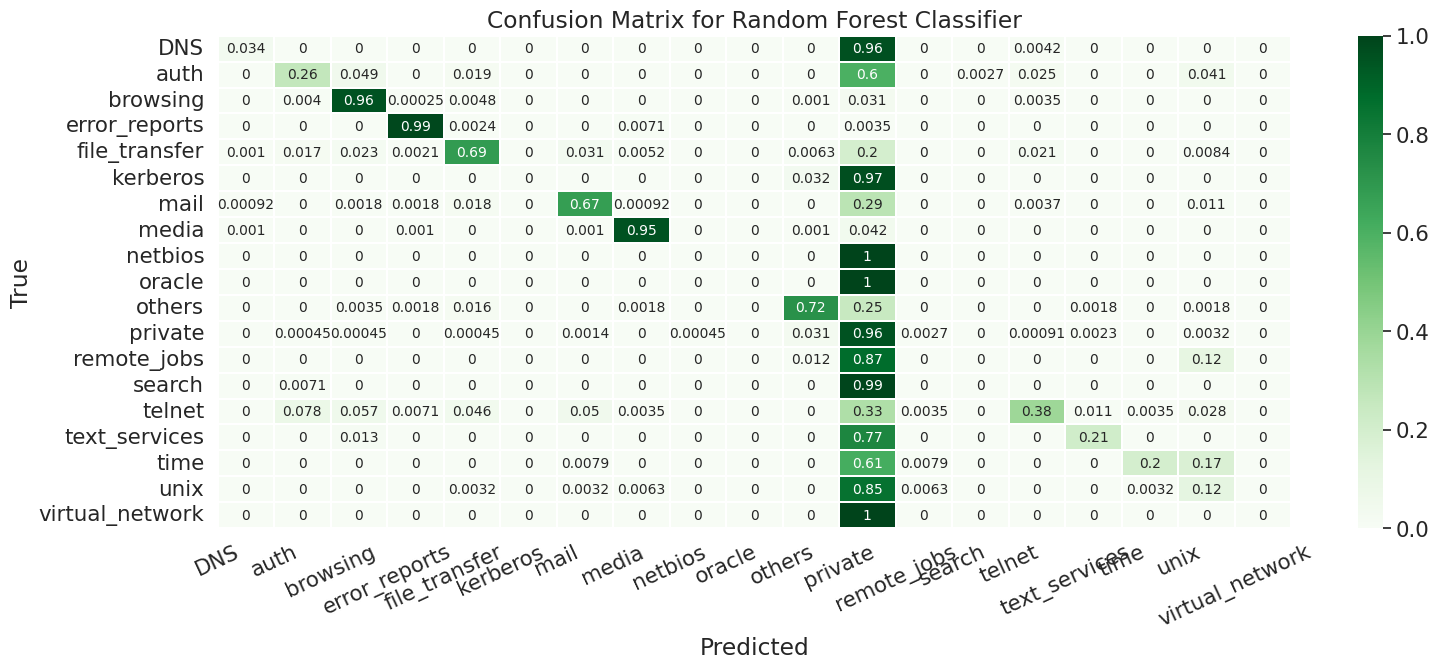

In [ ]:
# Identify categorical columns in X_train and X_test
categorical_cols = X_train.select_dtypes(include=['object']).columns

# Apply one-hot encoding to categorical columns
X_train = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

# Ensure the columns in X_test match X_train after encoding
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

# Proceed with fitting the model and evaluating
clf = RandomForestClassifier(n_estimators=100, max_depth=40, random_state=1)
print("Training Started")
clf.fit(X_train, y_train)

print("Testing the classifier")
y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print('\n')

print("===================CLASSIFICATION REPORT=======================")
print(classification_report(y_test, y_pred))
print('\n')

print("===================CONFUSION MATRIX=======================")
pretty_confusion(y_test, y_pred, "Random Forest Classifier")

In [ ]:

test_X=df_test[['dst_host_srv_diff_host_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'wrong_fragment',
            'root_shell', 'land', 'flag', 'attack', 'dst_host_count', 'src_bytes']]
test_y=df_test['class']

Testing the classifier model
accuracy 0.7075940383250532


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       151
           auth       0.41      0.34      0.37       259
       browsing       0.97      0.97      0.97      7889
  error_reports       0.76      0.95      0.84      1043
  file_transfer       0.40      0.63      0.49      1596
       kerberos       0.00      0.00      0.00        45
           mail       0.88      0.45      0.59      2417
          media       0.63      0.94      0.76       926
        netbios       0.00      0.00      0.00        76
         oracle       0.00      0.00      0.00        18
         others       0.55      0.26      0.35       941
        private       0.57      0.73      0.64      4774
    remote_jobs       0.20      0.00      0.01       259
         search       0.00      0.00      0.00        79
         telnet       0.40      0

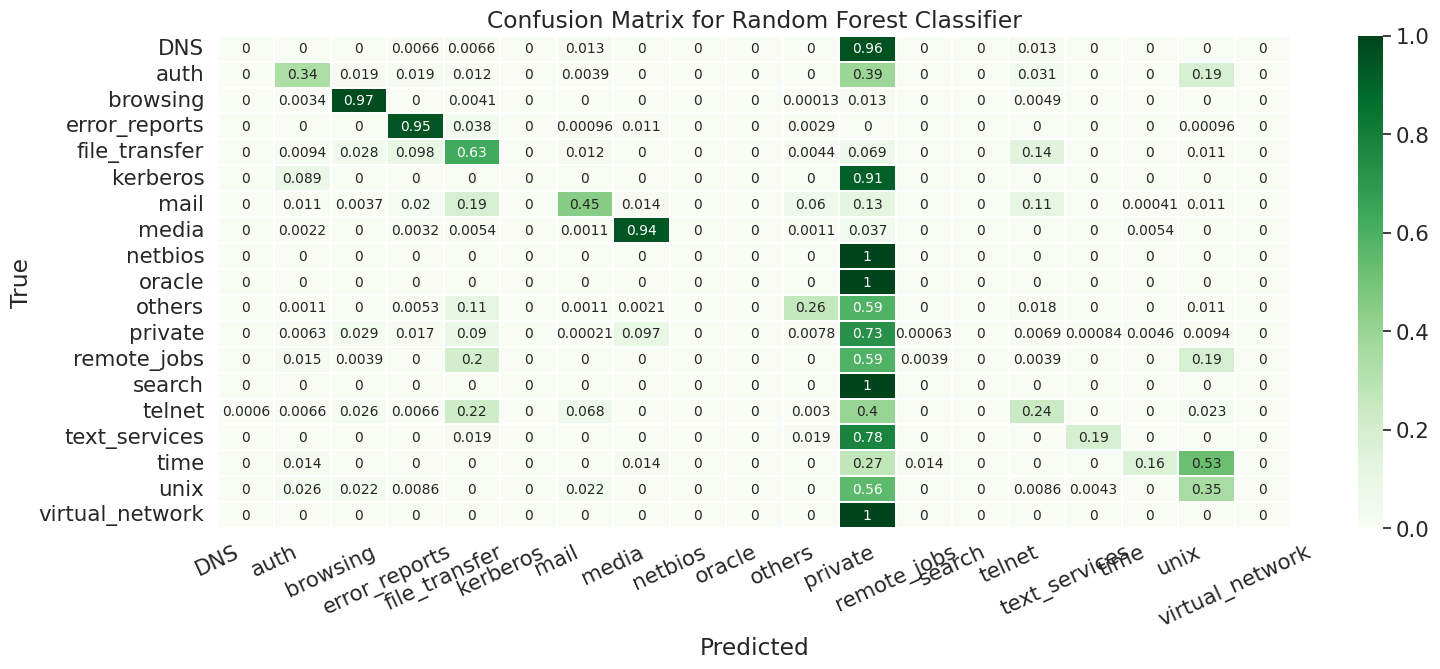

In [ ]:
# Apply one-hot encoding to categorical columns in test_X to match training data
test_X = pd.get_dummies(test_X, columns=['flag', 'attack'], drop_first=True)

# Ensure test_X has the same columns as X_train
test_X = test_X.reindex(columns=X_train.columns, fill_value=0)

# Proceed with testing the model
print("Testing the classifier model")
test_y_pred = clf.predict(test_X)

# Calculate and print the accuracy and classification report
print('accuracy %s' % accuracy_score(test_y, test_y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(test_y, test_y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(test_y, test_y_pred, "Random Forest Classifier")

**AdaBoost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

Training Started
Testing the classifier
accuracy 0.7746467693284649


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.67      0.03      0.06       236
           auth       0.63      0.27      0.37       366
       browsing       0.98      0.96      0.97      3997
  error_reports       0.99      1.00      0.99       848
  file_transfer       0.88      0.68      0.77       956
       kerberos       0.00      0.00      0.00        62
           mail       0.94      0.65      0.77      1082
          media       0.99      0.95      0.97       977
        netbios       0.00      0.00      0.00       102
         oracle       0.00      0.00      0.00        25
         others       0.82      0.73      0.77       570
        private       0.48      0.95      0.64      2203
    remote_jobs       0.00      0.00      0.00       173
         search       0.00      0.00      0.00       140
         telnet       

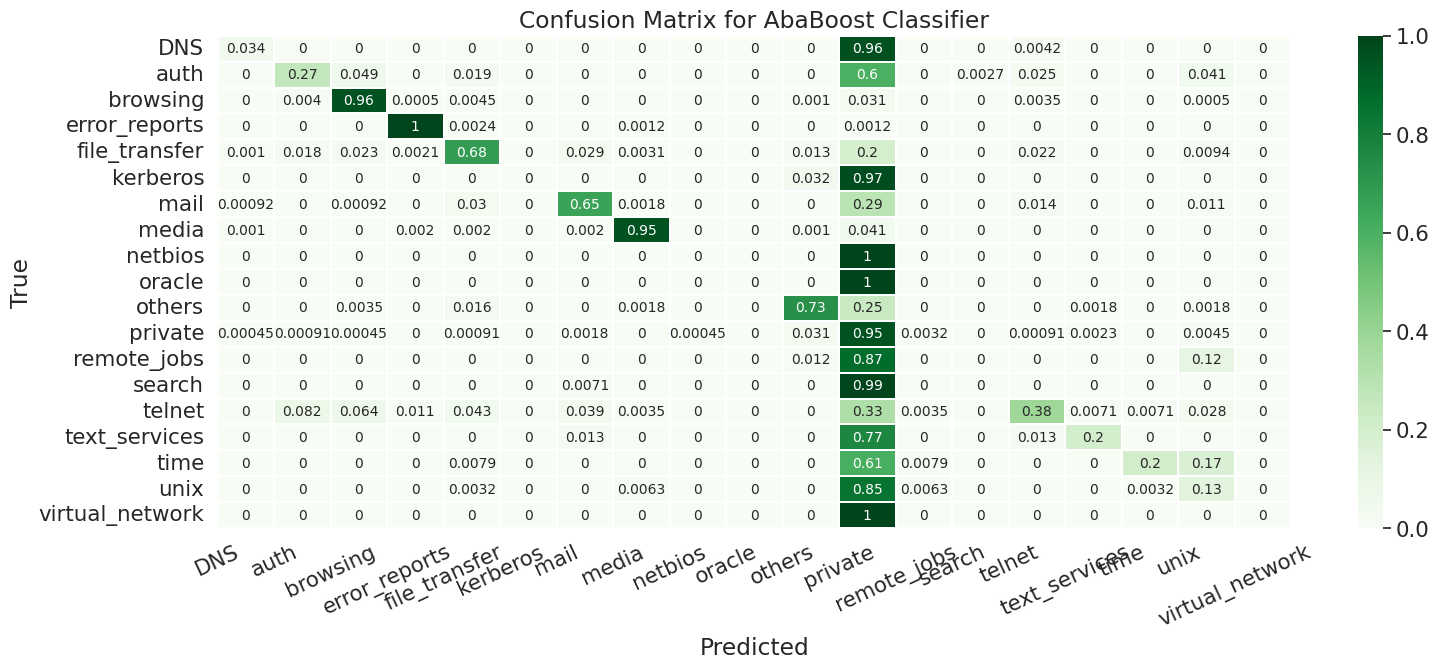

In [ ]:
clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=40), n_estimators=100)
print("Training Started")
clf.fit(X_train, y_train)

print("Testing the classifier")
y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(y_test,y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(y_test, y_pred, "AbaBoost Classifier")

Testing the classifier model
accuracy 0.6332061745919092


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       151
           auth       0.34      0.32      0.33       259
       browsing       0.97      0.89      0.93      7889
  error_reports       0.59      0.94      0.72      1043
  file_transfer       0.35      0.23      0.27      1596
       kerberos       0.00      0.00      0.00        45
           mail       0.45      0.23      0.30      2417
          media       0.61      0.95      0.74       926
        netbios       0.00      0.00      0.00        76
         oracle       0.00      0.00      0.00        18
         others       0.21      0.23      0.22       941
        private       0.53      0.76      0.62      4774
    remote_jobs       0.08      0.00      0.01       259
         search       0.00      0.00      0.00        79
         telnet       0.42      0

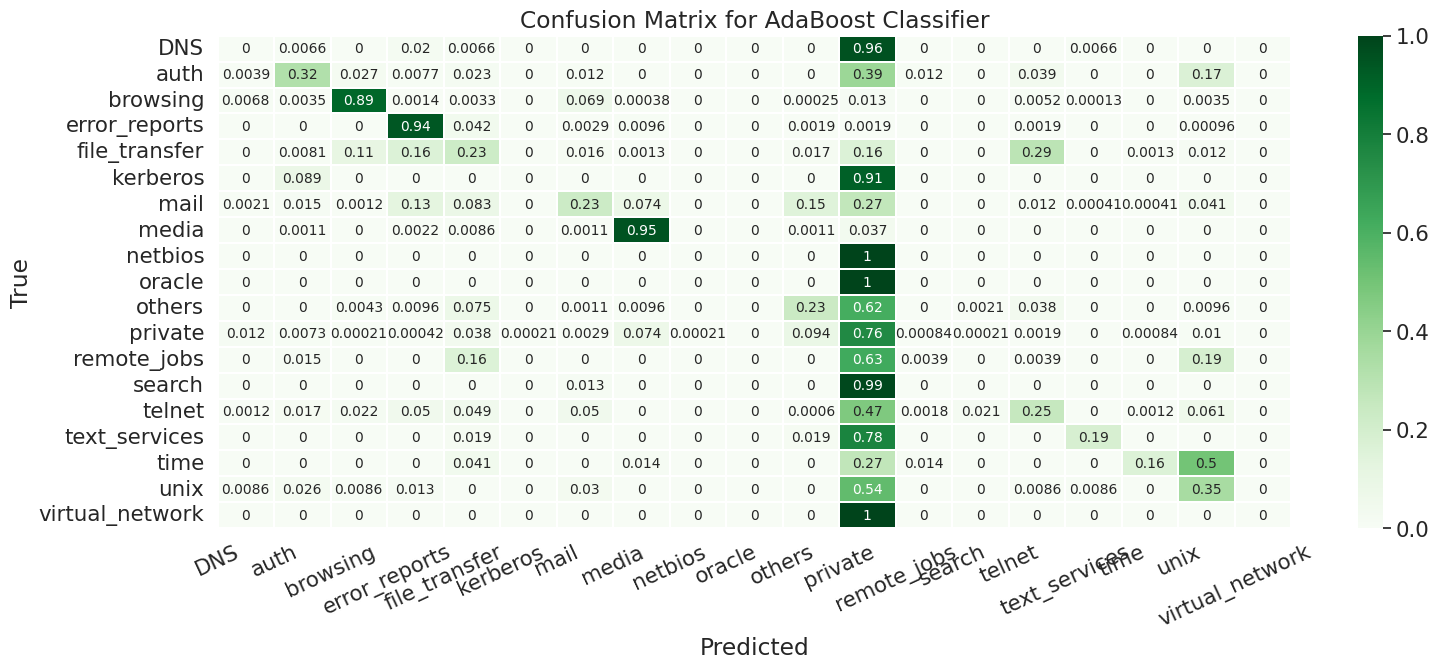

In [ ]:
print("Testing the classifier model")
test_y_pred = clf.predict(test_X)

print('accuracy %s' % accuracy_score(test_y, test_y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(test_y,test_y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(test_y, test_y_pred, "AdaBoost Classifier")

**C4.5 Classifier**

Training Started
Testing the classifier
accuracy 0.7736942371805049


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.78      0.03      0.06       236
           auth       0.62      0.25      0.35       366
       browsing       0.98      0.96      0.97      3997
  error_reports       0.99      0.99      0.99       848
  file_transfer       0.88      0.67      0.76       956
       kerberos       0.00      0.00      0.00        62
           mail       0.94      0.65      0.77      1082
          media       0.98      0.95      0.97       977
        netbios       0.00      0.00      0.00       102
         oracle       0.00      0.00      0.00        25
         others       0.81      0.72      0.76       570
        private       0.48      0.96      0.64      2203
    remote_jobs       0.00      0.00      0.00       173
         search       0.00      0.00      0.00       140
         telnet       

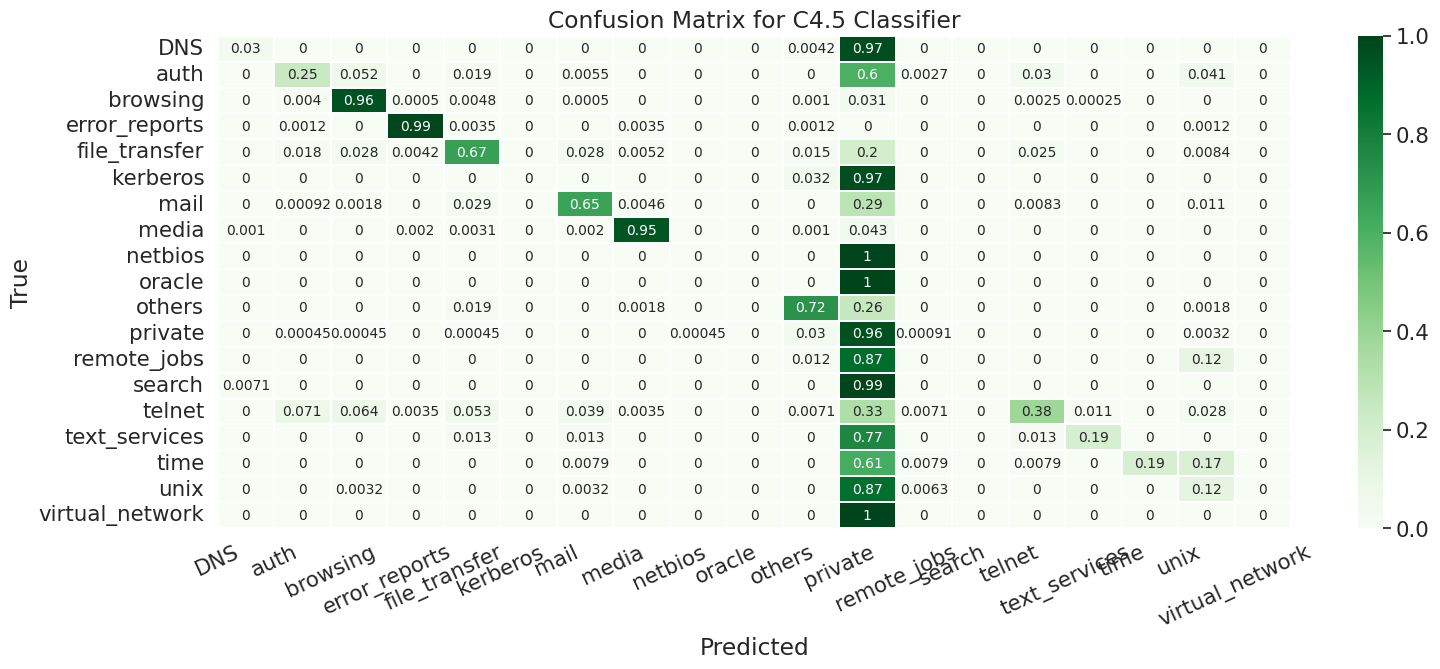

In [ ]:
clf = DecisionTreeClassifier(criterion='gini', random_state=200, max_depth=82, min_samples_leaf=5)
print("Training Started")
clf.fit(X_train, y_train)

print('Testing the classifier')
y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(y_test,y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(y_test, y_pred, "C4.5 Classifier")

Testing the classifier model
accuracy 0.6365773598296665


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       151
           auth       0.30      0.32      0.31       259
       browsing       0.80      0.90      0.84      7889
  error_reports       0.79      0.94      0.86      1043
  file_transfer       0.31      0.38      0.34      1596
       kerberos       0.00      0.00      0.00        45
           mail       0.77      0.27      0.40      2417
          media       0.79      0.95      0.86       926
        netbios       0.00      0.00      0.00        76
         oracle       0.00      0.00      0.00        18
         others       0.32      0.24      0.27       941
        private       0.62      0.77      0.68      4774
    remote_jobs       0.11      0.00      0.01       259
         search       0.00      0.00      0.00        79
         telnet       0.09      0

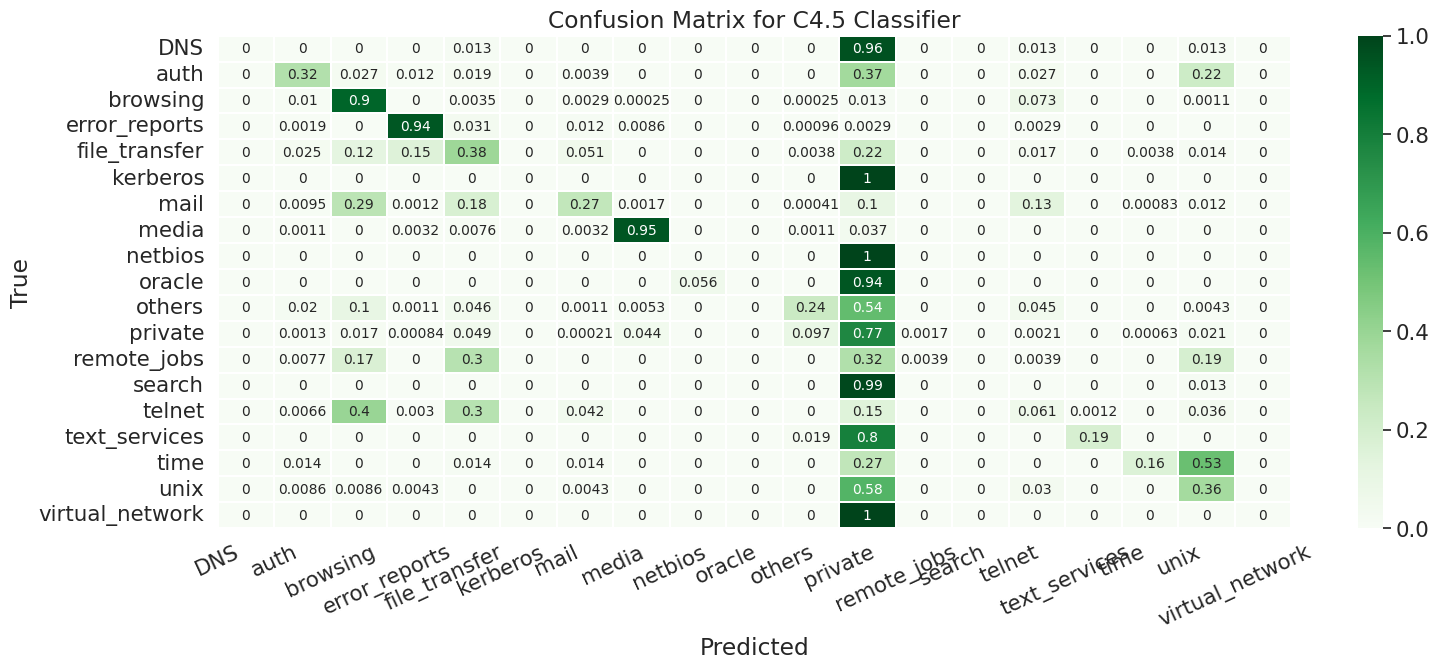

In [ ]:

print("Testing the classifier model")
test_y_pred = clf.predict(test_X)

print('accuracy %s' % accuracy_score(test_y, test_y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(test_y,test_y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(test_y, test_y_pred, "C4.5 Classifier")

**MLP Classifier**

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor

Training Started
Testing the classifier
accuracy 0.5242895697729798


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       236
           auth       0.08      0.76      0.14       366
       browsing       0.83      0.89      0.86      3997
  error_reports       0.91      0.84      0.87       848
  file_transfer       0.28      0.31      0.29       956
       kerberos       0.00      0.00      0.00        62
           mail       0.14      0.00      0.00      1082
          media       0.81      0.84      0.82       977
        netbios       0.00      0.00      0.00       102
         oracle       0.00      0.00      0.00        25
         others       0.64      0.55      0.59       570
        private       0.56      0.28      0.37      2203
    remote_jobs       0.00      0.00      0.00       173
         search       0.00      0.00      0.00       140
         telnet       

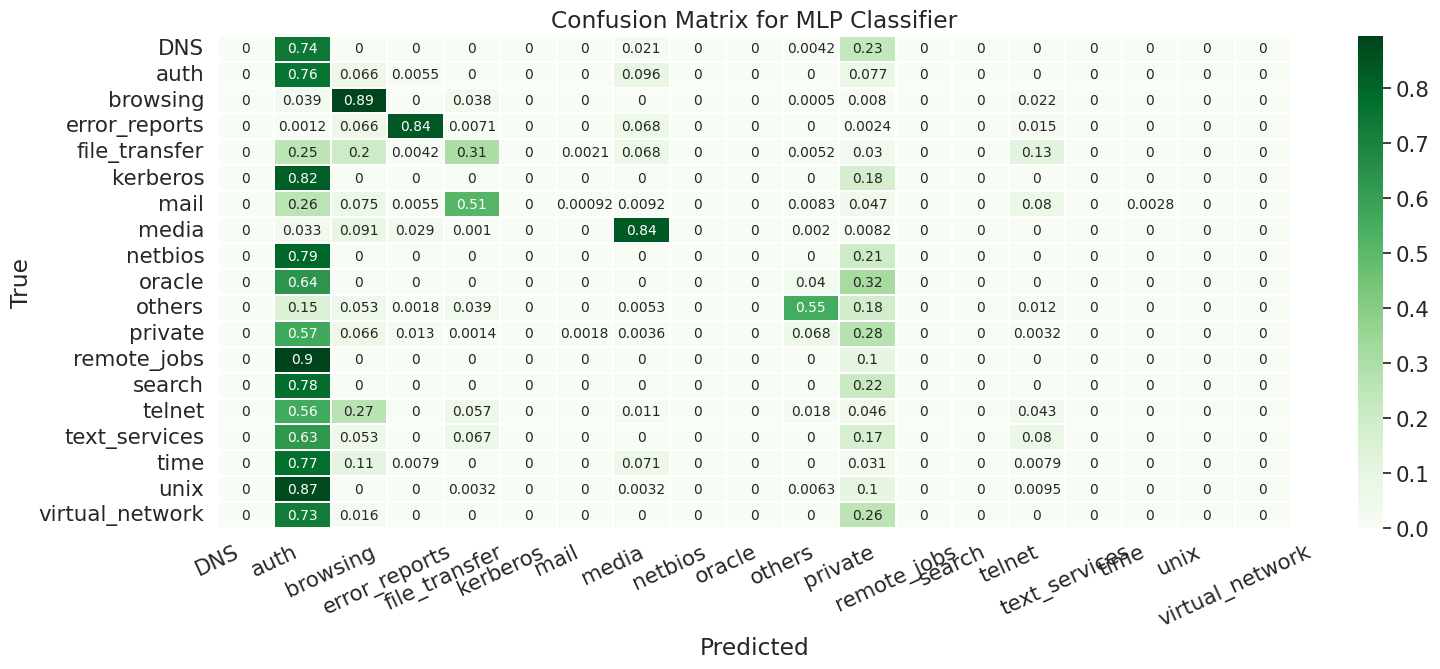

In [ ]:
clf = MLPClassifier(max_iter=150, random_state=480)
print('Training Started')
clf.fit(X_train, y_train)

print("Testing the classifier")
y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(y_test,y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(y_test, y_pred, "MLP Classifier")

Testing the classifier model
accuracy 0.48970901348474094


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       151
           auth       0.04      0.51      0.07       259
       browsing       0.83      0.81      0.82      7889
  error_reports       0.49      0.76      0.60      1043
  file_transfer       0.32      0.33      0.32      1596
       kerberos       0.00      0.00      0.00        45
           mail       0.03      0.00      0.01      2417
          media       0.35      0.84      0.50       926
        netbios       0.00      0.00      0.00        76
         oracle       0.00      0.00      0.00        18
         others       0.27      0.34      0.30       941
        private       0.67      0.44      0.53      4774
    remote_jobs       0.00      0.00      0.00       259
         search       0.00      0.00      0.00        79
         telnet       0.02      

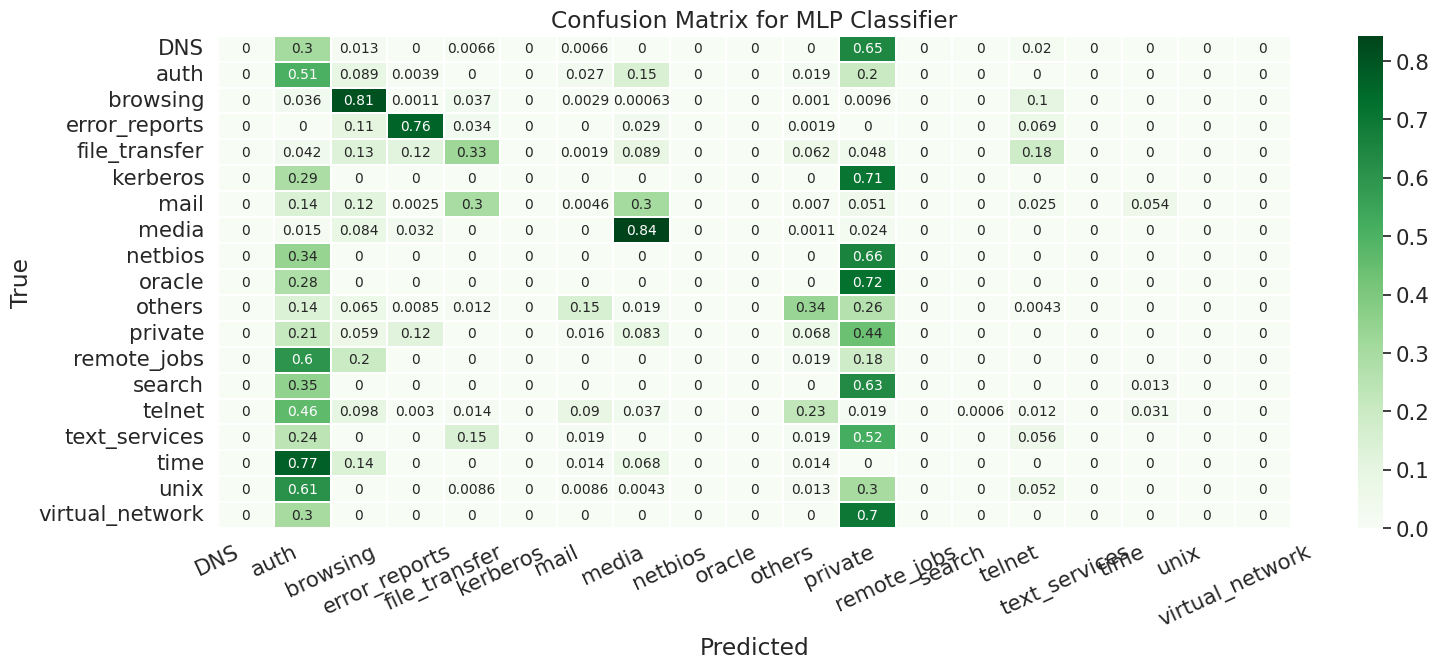

In [ ]:
print("Testing the classifier model")
test_y_pred = clf.predict(test_X)

print('accuracy %s' % accuracy_score(test_y, test_y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(test_y,test_y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(test_y, test_y_pred, "MLP Classifier")

**SVM Classifier with rbf kernel**

In [ ]:
from sklearn.svm import SVC

Training Started
Testing the classifier
accuracy 0.32028893475154785


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       236
           auth       0.00      0.00      0.00       366
       browsing       0.32      1.00      0.48      3997
  error_reports       0.00      0.00      0.00       848
  file_transfer       0.95      0.04      0.07       956
       kerberos       0.00      0.00      0.00        62
           mail       0.00      0.00      0.00      1082
          media       0.00      0.00      0.00       977
        netbios       0.00      0.00      0.00       102
         oracle       0.00      0.00      0.00        25
         others       0.00      0.00      0.00       570
        private       0.00      0.00      0.00      2203
    remote_jobs       0.00      0.00      0.00       173
         search       0.00      0.00      0.00       140
         telnet      

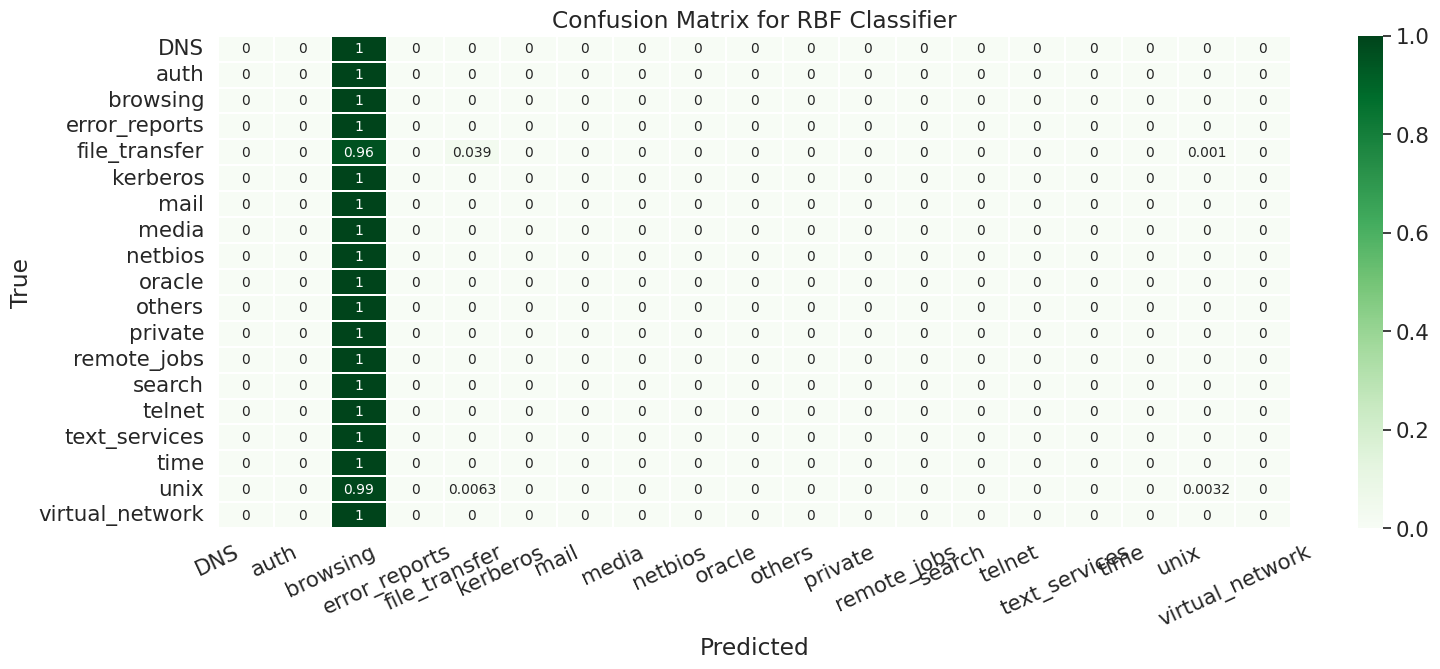

In [ ]:
clf = SVC(kernel='rbf', random_state=7)
print('Training Started')
clf.fit(X_train, y_train)

print('Testing the classifier')
y_pred = clf.predict(X_test)

print('accuracy %s' % accuracy_score(y_test, y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(y_test,y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(y_test, y_pred, "RBF Classifier")


Testing the classifier model
accuracy 0.3502927608232789


                        ===CLASSIFICATION REPORT===
                 precision    recall  f1-score   support

            DNS       0.00      0.00      0.00       151
           auth       0.00      0.00      0.00       259
       browsing       0.35      1.00      0.52      7889
  error_reports       0.00      0.00      0.00      1043
  file_transfer       0.86      0.00      0.01      1596
       kerberos       0.00      0.00      0.00        45
           mail       0.00      0.00      0.00      2417
          media       0.00      0.00      0.00       926
        netbios       0.00      0.00      0.00        76
         oracle       0.00      0.00      0.00        18
         others       0.00      0.00      0.00       941
        private       0.00      0.00      0.00      4774
    remote_jobs       0.00      0.00      0.00       259
         search       0.00      0.00      0.00        79
         telnet       0.00      0

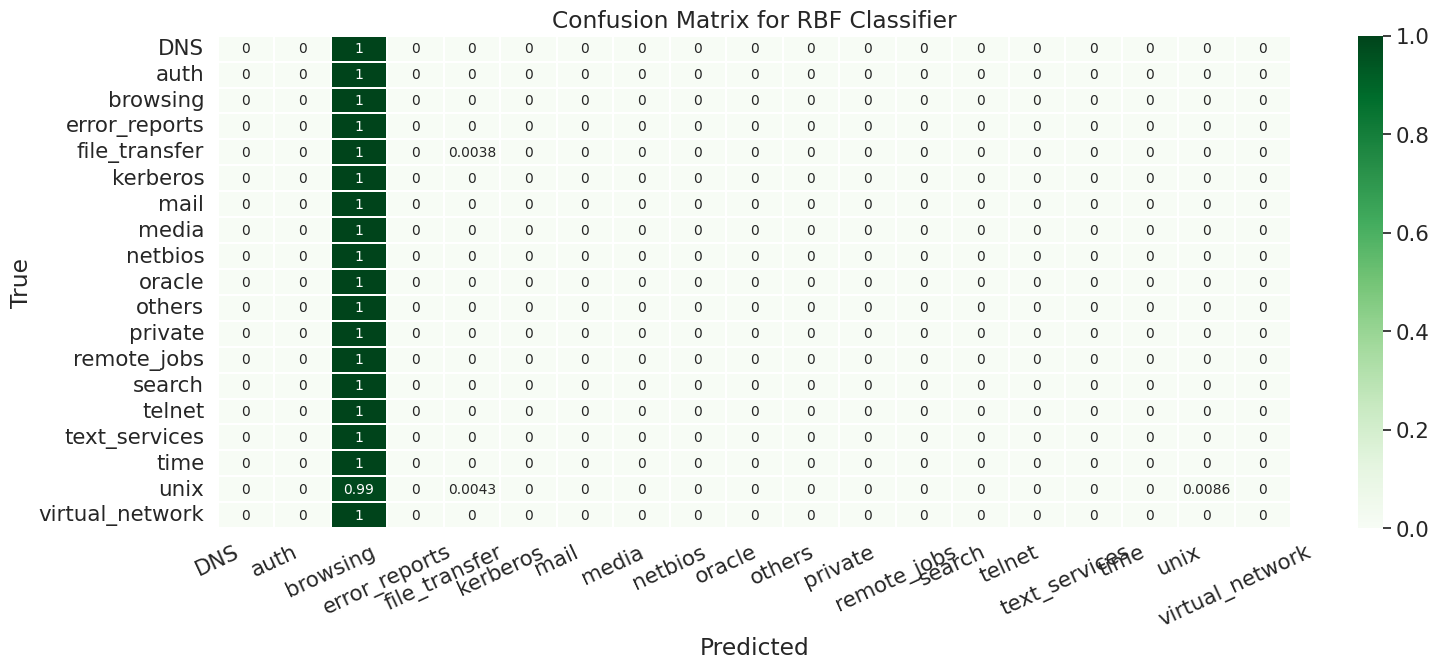

In [ ]:
print("Testing the classifier model")
test_y_pred = clf.predict(test_X)

print('accuracy %s' % accuracy_score(test_y, test_y_pred))
print('\n')

print("                        ===CLASSIFICATION REPORT===")
print(classification_report(test_y,test_y_pred))
print('\n')

print("==================================================CONFUSION MATRIX======================================================")
pretty_confusion(test_y, test_y_pred, "RBF Classifier")